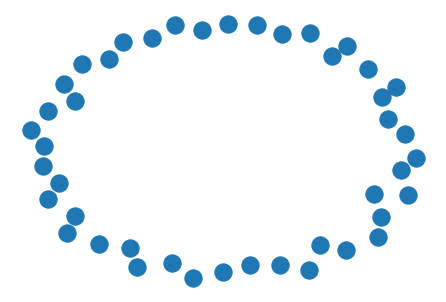

In [52]:
import matplotlib.pyplot as plt
import networkx as nx
import csv

# Establish variables to be filled with public transport data
stops = {}
stopsOnTrip = {}
routes = {}

# Load metadata about each stop (hållplats) in Uppsala
with open('./gtfs_static_data_ul/stops.csv') as file:
    reader = csv.DictReader(file)
    # Create dictionary key for each row in stops.csv with values on name, latitude and longitude
    for row in reader:
        stops[row['stop_id']] = {'stop_name': row['stop_name'],
                                 'stop_lat': row['stop_lat'], 'stop_lon': row['stop_lon']}

# Load data on when all trips (avgångar) pass each stop (hållplats) in Uppsala
with open('./gtfs_static_data_ul/stop_times.csv') as file:
    reader1 = csv.DictReader(file)
    # Loops through stop_times.csv and creates dictionary with stops per unique trip
    for row in reader1:
        if row['trip_id'] not in stopsOnTrip:
            stopsOnTrip[row['trip_id']] = [stops[row['stop_id']]]
        if row['trip_id'] in stopsOnTrip:
            stopsOnTrip[row['trip_id']].append(stops[row['stop_id']])
            



# Load data on all trips (avgångar) in Uppsala
with open('./gtfs_static_data_ul/trips.csv') as file:
    reader2 = csv.DictReader(file)
    # Loops through trips.csv and creates dictionary with the first trip per unique route
    for row in reader2:
        if row['route_id'] not in routes:
            routes[row['route_id']] = stopsOnTrip[row['trip_id']]

D = nx.Graph()
counter = 0
for key in routes['9011001057900000']:
    D.add_node(counter, stop_name = key['stop_name'], longitude = key['stop_lon'], latitude = key['stop_lat'])
    counter = counter+1
            
nx.draw(D)

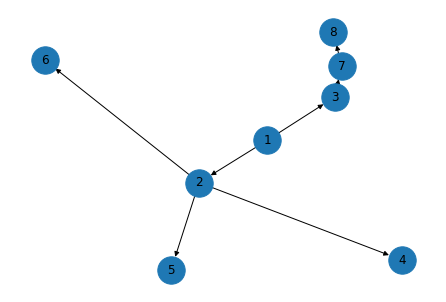

In [26]:
dg = nx.DiGraph()
dg.add_edges_from([(1,2), (1,3), (2,4), (2,5), (2,6), (3,7), (7,8)])
nx.draw(dg, with_labels=True, node_size=750  )


In [28]:
print (nx.degree_centrality(dg))

{1: 0.2857142857142857, 2: 0.5714285714285714, 3: 0.2857142857142857, 4: 0.14285714285714285, 5: 0.14285714285714285, 6: 0.14285714285714285, 7: 0.2857142857142857, 8: 0.14285714285714285}


In [29]:
print (nx.closeness_centrality(dg))

{1: 0.0, 2: 0.14285714285714285, 3: 0.14285714285714285, 4: 0.19047619047619047, 5: 0.19047619047619047, 6: 0.19047619047619047, 7: 0.19047619047619047, 8: 0.21428571428571427}


In [31]:
gm=nx.MultiGraph(day ='friday', month = 'december', year = 2015)


In [35]:
gm.add_node(1, time='10pm')


In [34]:
gm.graph


{'day': 'friday', 'month': 'december', 'year': 2015}

In [37]:
gm.add_node(1, time='10pm')

gm.node[1]

In [38]:
gm.node[1]

AttributeError: 'MultiGraph' object has no attribute 'node'

In [39]:
gm.add_edge(1,2)


0

In [40]:
gm.graph

{'day': 'friday', 'month': 'december', 'year': 2015}

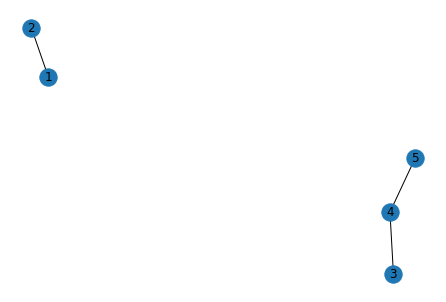

In [43]:
nx.draw(gm, with_labels=True)

In [42]:
gm.add_edges_from([(3,4), (4,5)])


[0, 0]

gm.nodes(data=True)

In [44]:
gm.nodes(data=True)

NodeDataView({1: {'time': '10pm'}, 2: {}, 3: {}, 4: {}, 5: {}})

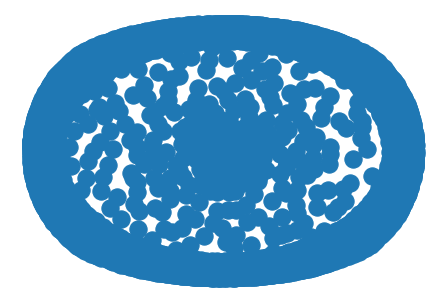